# **The fifth in-class-exercise (40 points in total, 04/12/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/exercise05_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [3]:
# Write your code here
import pandas as pd 
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer
import sklearn
from sklearn.model_selection import train_test_split
import numpy
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [4]:
my_data_train=pd.read_fwf("/content/sample_data/stsa-train.txt", header=None)
my_data_train= pd.DataFrame(my_data_train)
my_data_test=pd.read_fwf("/content/sample_data/stsa-test.txt", header=None)
my_data_test= pd.DataFrame(my_data_test)

In [5]:
#Now splitting the my_data_train in to training and validation data

del my_data_train[2]
my_data_train = my_data_train.rename(columns={0: "Review", 1: "Text"})
del my_data_test[2]
del my_data_test[3]
my_data_test = my_data_test.rename(columns={0: "Review", 1: "Text"})
x_train, x_validate, y_train, y_validate = sklearn.model_selection.train_test_split(my_data_train['Text'], my_data_train['Review'], train_size=0.8, test_size=0.2)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [6]:
my_kf = KFold(n_splits=10)

In [7]:
# Analysis of Various Algorithms
#MultinominalNB:
pln = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
for train_index, test_index in my_kf.split(x_train, y_train):
    x_train_k, y_train_k = x_train[train_index], y_train[train_index]
    x_test_k, y_test_k = x_train[test_index], y_train[test_index]
    MNB_algorithm = pln.fit(x_train_k, y_train_k)
pred_validate = MNB_algorithm.predict(x_validate)
validation = {'Actual': y_validate, 'Predicted': pred_validate}
validation_df = pd.DataFrame(validation, columns = ['Actual', 'Predicted'])

In [8]:
#Evaluation of MultinominalNB:

my_final = MNB_algorithm.predict(my_data_test['Text'])
print('Accuracy of MultinomialNB :', (accuracy_score(my_data_test['Review'], my_final)*100))
print('Recall of MultinomialNB :', (recall_score(my_data_test['Review'], my_final)*100))
print('Precision of MultinomialNB :', (accuracy_score(my_data_test['Review'], my_final)*100))
print('F1-score of MultinomialNB :', (f1_score(my_data_test['Review'], my_final, average='macro')*100))

Accuracy of MultinomialNB : 81.05436573311367
Recall of MultinomialNB : 87.23872387238724
Precision of MultinomialNB : 81.05436573311367
F1-score of MultinomialNB : 80.98498126933865


In [9]:
# Analysis of Various Algorithms
#SVM:
pln = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC())])
for train_index, test_index in my_kf.split(x_train, y_train):
    x_train_k, y_train_k = x_train[train_index], y_train[train_index]
    x_test_k, y_test_k = x_train[test_index], y_train[test_index]
    SVM_algorithm = pln.fit(x_train_k, y_train_k)
pred_validate = SVM_algorithm.predict(x_validate)
validation = {'Actual': y_validate, 'Predicted': pred_validate}
validation_df = pd.DataFrame(validation, columns = ['Actual', 'Predicted'])

In [10]:
#Evaluation of SVM:
my_final = SVM_algorithm.predict(my_data_test['Text'])
print(' Accuracy of SVM :', (accuracy_score(my_data_test['Review'], my_final)*100))
print('Recall of SVM :', (recall_score(my_data_test['Review'], my_final)*100))
print(' Precision of SVM :', (accuracy_score(my_data_test['Review'], my_final)*100))
print('F1-score of SVM :', (f1_score(my_data_test['Review'], my_final, average='macro')*100))

 Accuracy of SVM : 79.13234486545853
Recall of SVM : 80.08800880088009
 Precision of SVM : 79.13234486545853
F1-score of SVM : 79.13092885733104


In [11]:
# Analysis of Various Algorithms
#KNN:
pln = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', KNeighborsClassifier())])
for train_index, test_index in my_kf.split(x_train, y_train):
    x_train_k, y_train_k = x_train[train_index], y_train[train_index]
    x_test_k, y_test_k = x_train[test_index], y_train[test_index]
    KNN_algorithm = pln.fit(x_train_k, y_train_k)
pred_validate = KNN_algorithm.predict(x_validate)
validation = {'Actual': y_validate, 'Predicted': pred_validate}
validation_df = pd.DataFrame(validation, columns = ['Actual', 'Predicted'])

In [12]:
#Evaluation of KNN:
my_final = KNN_algorithm.predict(my_data_test['Text'])
print(' Accuracy of KNN :', (accuracy_score(my_data_test['Review'], my_final)*100))
print('Recall of KNN :', (recall_score(my_data_test['Review'], my_final)*100))
print(' Precision of KNN :', (accuracy_score(my_data_test['Review'], my_final)*100))
print('F1-score of KNN :', (f1_score(my_data_test['Review'], my_final, average='macro')*100))

 Accuracy of KNN : 72.59747391543108
Recall of KNN : 76.45764576457645
 Precision of KNN : 72.59747391543108
F1-score of KNN : 72.55920954684957


In [13]:
# Analysis of Various Algorithms
#Decision Tree:
pln = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', tree.DecisionTreeClassifier())])
for train_index, test_index in my_kf.split(x_train, y_train):
    x_train_k, y_train_k = x_train[train_index], y_train[train_index]
    x_test_k, y_test_k = x_train[test_index], y_train[test_index]
    DT_algorithm = pln.fit(x_train_k, y_train_k)
pred_validate = DT_algorithm.predict(x_validate)
validation = {'Actual': y_validate, 'Predicted': pred_validate}
validation_df = pd.DataFrame(validation, columns = ['Actual', 'Predicted'])

In [14]:
#Evaluation of Decision Tree:
my_final = DT_algorithm.predict(my_data_test['Text'])
print(' Accuracy of Decision Tree :', (accuracy_score(my_data_test['Review'], my_final)*100))
print('Recall of Decision Tree :', (recall_score(my_data_test['Review'], my_final)*100))
print(' Precision of Decision Tree :', (accuracy_score(my_data_test['Review'], my_final)*100))
print('F1-score of Decision Tree :', (f1_score(my_data_test['Review'], my_final, average='macro')*100))

 Accuracy of Decision Tree : 61.44975288303131
Recall of Decision Tree : 68.31683168316832
 Precision of Decision Tree : 61.44975288303131
F1-score of Decision Tree : 61.27306635257166


In [15]:
# Analysis of Various Algorithms
#Random Forest:
pln = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_estimators=100))])
for train_index, test_index in my_kf.split(x_train, y_train):
    x_train_k, y_train_k = x_train[train_index], y_train[train_index]
    x_test_k, y_test_k = x_train[test_index], y_train[test_index]
    RF_algorithm = pln.fit(x_train_k, y_train_k)
pred_validate = RF_algorithm.predict(x_validate)
validation = {'Actual': y_validate, 'Predicted': pred_validate}
validation_df = pd.DataFrame(validation, columns = ['Actual', 'Predicted'])

In [16]:
#Evaluation of Random Forest:
my_final = RF_algorithm.predict(my_data_test['Text'])
print(' Accuracy of Random Forest :', (accuracy_score(my_data_test['Review'], my_final)*100))
print('Recall of Random Forest :', (recall_score(my_data_test['Review'], my_final)*100))
print(' Precision of Random Forest :', (accuracy_score(my_data_test['Review'], my_final)*100))
print('F1-score of Random Forest :', (f1_score(my_data_test['Review'], my_final, average='macro')*100))

 Accuracy of Random Forest : 72.04832509610104
Recall of Random Forest : 75.68756875687569
 Precision of Random Forest : 72.04832509610104
F1-score of Random Forest : 72.01375626708777


In [17]:
# Analysis of Various Algorithms
#XGBoost:
pln = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', GradientBoostingClassifier(n_estimators=20,verbose=2))])
for train_index, test_index in my_kf.split(x_train, y_train):
    x_train_k, y_train_k = x_train[train_index], y_train[train_index]
    x_test_k, y_test_k = x_train[test_index], y_train[test_index]
    
    XGB_algorithm = pln.fit(x_train_k, y_train_k)
pred_validate = XGB_algorithm.predict(x_validate)
validation = {'Actual': y_validate, 'Predicted': pred_validate}
validation_df = pd.DataFrame(validation, columns = ['Actual', 'Predicted'])

      Iter       Train Loss   Remaining Time 
         1           1.3738            1.18s
         2           1.3656            0.99s
         3           1.3585            0.90s
         4           1.3519            0.87s
         5           1.3463            0.80s
         6           1.3410            0.73s
         7           1.3363            0.67s
         8           1.3323            0.78s
         9           1.3282            0.82s
        10           1.3243            0.83s
        11           1.3212            0.72s
        12           1.3176            0.64s
        13           1.3139            0.55s
        14           1.3105            0.45s
        15           1.3073            0.36s
        16           1.3037            0.28s
        17           1.3001            0.20s
        18           1.2977            0.13s
        19           1.2948            0.06s
        20           1.2924            0.00s
      Iter       Train Loss   Remaining Time 
        

In [18]:
#Evaluation of XG Boost::
my_final = XGB_algorithm.predict(my_data_test['Text'])
print(' Accuracy of XG Boost :', (accuracy_score(my_data_test['Review'], my_final)*100))
print('Recall of XG Boost :', (recall_score(my_data_test['Review'], my_final)*100))
print(' Precision of XG Boost :', (accuracy_score(my_data_test['Review'], my_final)*100))
print('F1-score of XG Boost :', (f1_score(my_data_test['Review'], my_final, average='macro')*100))

 Accuracy of XG Boost : 58.6490939044481
Recall of XG Boost : 87.34873487348734
 Precision of XG Boost : 58.6490939044481
F1-score of XG Boost : 54.97785195300431


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [3]:
#Write your code here.
import pandas as pd
#load the data
sample=pd.read_csv("/content/sample_data/Amazon_Unlocked_Mobile.csv")



In [4]:
print(sample.shape)

(413840, 6)


In [5]:
sample.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


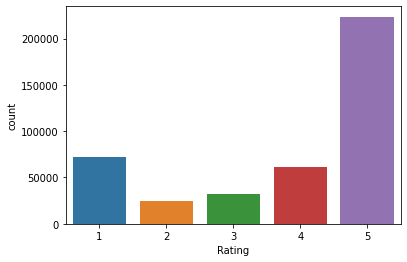

In [6]:
import seaborn as sns
sns.countplot(sample.Rating)

In [7]:
#converting the Numerical reviws to categorical reviews on codition above 3 are
#positive and below 3 are negative as reviews rating with 3 are not much useful
#for analysis

#function
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive
actualScore = sample['Rating']
positiveNegative = actualScore.map(partition) 
sample['Rating'] = positiveNegative

In [8]:
sample.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0


In [9]:
# no of positive and negative reviews
sample["Rating"].value_counts()
#here we can say it is a unbalanced data set

positive    316762
negative     97078
Name: Rating, dtype: int64

In [13]:
#dropping  the duplicates column if any using drop duplicates from pandas
sorted_data=sample.sort_values('Product Name', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
final=sorted_data.drop_duplicates(subset={"Brand Name","Rating","Reviews","Review Votes"}, keep='first', inplace=False)
final.shape

(200713, 6)

In [16]:

# Help..Num is always less than Denom.. as Denom is people who upvote and donwvote
#Before understanding text preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Rating'].value_counts()



(200713, 6)


positive    148222
negative     52491
Name: Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


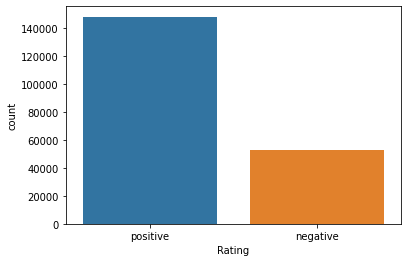

In [17]:
import seaborn as sns
sns.countplot(final.Rating)

In [19]:
import re
i=0;
for sent in final['Text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

KeyError: ignored

In [20]:
#Clustering DBSCAN
# Computing 200th Nearest neighbour distance
minPts = 2 * 100
# Lower bound function copied from -> https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] # Dist 199 contains the distance of 200th nearest neighbour.

In [25]:
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

In [29]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

NameError: ignored

In [26]:
# Choosing the best cluster using Elbow Method.
# source credit,few parts of min squred loss info is taken from different parts of the stakoverflow answers.
# this is used to understand to find the optimal clusters in differen way rather than used in BOW, TFIDF
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
    
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

NameError: ignored

In [30]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

NameError: ignored

In [28]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

NameError: ignored

In [21]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

NameError: ignored

In [31]:
#Clustering Hierarchical
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)# cut at 30 to get 5 clusters

NameError: ignored

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
#You can write you answer here. (No code needed)
Clustering is a procedure in unsupervised AI which bunches data of interest into groups based
 on the comparability of data accessible for the pieces of information in the dataset.
K-Means and DBScan (Density Based Spatial Clustering of Applications with Noise) are two of
 the most famous bunching calculations in unsupervised AI.
K-Means is a centroid-based or segment based bunching calculation. 
DBScan is a thickness based bunching calculation. K-Means calculation segments every one of the
places in the example space into K groups of similarity. The comparability is typically estimated 
utilizing Euclidian Distance . DBScan is a thickness based clustering calculation. 
The critical reality of this calculation is that the neighborhood of each point in a bunch which 
is inside a given range (R) should have a base number of focuses (M). In K-Means, 
Clusters framed are circular or arched in shape and should have same element size.
In DBScan, Clusters framed are sperichal or convex in shape and might not have same element size.

Hierarchical grouping otherwise called hierarchical cluster analysis (HCA) is additionally a 
technique for group investigation which tries to construct an order of clusters without having 
fixed number of cluster.K Means clustering required advance information on K for example no. of 
groups one need to isolate your information.
In various Hierarchical Clustering one can stop at quite a few groups, one see as proper by 
interpreting the dendrogram. One can involve middle or mean as a cluster place to address each 
group. Agglomerative strategies start with 'n' clusters and successively join comparative groups 
until just a single cluster is obtained.
